# STA 141B Assignment 2

Due __Jan 29, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded for correctness.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using data frames to index, slice, reshape, aggregate, and group data.

## Indexing

__Exercise 1.1 (10 points).__ Give three examples of indexing a data frame with `[ ]`, `.loc[ ]`, and `.iloc[ ]`, respectively. Explain how each of these indexing methods is different.

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"x": [1, 2, 3], "y": [4, 5, 6], "z":[7, 8, 9]}, index = [10, 20, 30])
df

,x,y,z
10,1,4,7
20,2,5,8
30,3,6,9


In [2]:
# indexing with [ ]
print(df["x"])
print(df[df["x"] > 1])

10    1
20    2
30    3
Name: x, dtype: int64
    x  y  z
20  2  5  8
30  3  6  9


`[ ]` only gets one column when given a name, or by applying a condition you can filter the rows.

In [3]:
# indexing with .loc[ ]
print(df.loc[10:20])

    x  y  z
10  1  4  7
20  2  5  8


`.loc[ ]` gets rows (or columns) with particular labels from the index. The slice is inclusive of the final name. So 10:30, will include row 30.

In [4]:
# indexing with .iloc[ ]
print(df.iloc[0:1])

    x  y  z
10  1  4  7


`.iloc[ ]` gets rows or columns at particular positions in the index, irrespective of the index names. The slice does not include the final index, so 0:1 includes only the first row. <br>

Ultimately, `[ ]` can be used for obtaining columns or filtering rows. However, if you want to slice the data, you would use `.loc[ ]` or `.iloc[ ]`, where `.loc[ ]` slices by name and `.iloc[ ]` slices by index position rather than name.

__Exercise 1.2 (10 points).__ What do negative indexes (as in `x[-1]`) do in Python? Create and try three examples of negative indexes for lists, NumPy arrays, and data frames, respectively. Then explain what you think negative indexes do. Confirm your explanation by linking to a relevant page in the Python, NumPy, or Pandas documentation.

In [5]:
# List
my_list = [10, 20, 30, 40, 50]
print(my_list[-1])

# Numpy array
my_npArray = np.array((100, 200, 300))
print(my_npArray[-1])

# Data Frames
my_df = pd.DataFrame({"x": [1, 2, 3], "y": [4, 5, 6], "z":[7, 8, 9]})
print(my_df)
print("\n") # to make output clearer to read
print(my_df[-1:])

50
300
   x  y  z
0  1  4  7
1  2  5  8
2  3  6  9


   x  y  z
2  3  6  9


The negative index obtains the end of the data where -1 is the last item, and -2 is second to last item. For lists, it begins with the last element, for arrays its the last element as well, and for data frames you can obtain the last row.

**Lists:** https://docs.python.org/3.7/tutorial/introduction.html#lists
<br>
**NumPy arrays:** https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html
<br>
**Data Frames:** https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

__Exercise 1.3 (10 points).__ Give an example and explain Pandas' data alignment (or index alignment) feature.

In [6]:
x = pd.Series([10, 20, 30])
y = pd.Series([100, 200, 300, 400])

x + y

0    110.0
1    220.0
2    330.0
3      NaN
dtype: float64

Python supports data alignment when performing vector operations, which means the elements will be aligned by index. In the example above, there is no value for index 3 in the Series, $x$, which is why NaN is returned. We could also give the index names, and doing so would be the vector operations would pair the elements from two Series if their index name match, then performs the operation on the pair.

In [7]:
x = pd.Series([10, 20, 30], index = ["a", "b", "c"])
y = pd.Series([100, 200, 300, 400], index = ["c", "b", "a", "d"])

x + y

a    310.0
b    220.0
c    130.0
d      NaN
dtype: float64

Here, we see the vector operation performs but that 10 and 300 are summed rather than 10 and 100. This is because 10 and 300 are **aligned** because they have the same index name.

__Exercise 1.4 (10 points).__ Explain the difference between the similarly-named data frame methods `.reindex()` and `.reset_index()`. Give two examples to show what each method respectively does.

How might these methods be useful when combined with Pandas' data alignment feature?

*Hint: Besides the Pandas documentation, `.reindex()` is explained in Python for Data Analysis 5.2, and `.reset_index()` is explained [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html#Index-setting-and-resetting).*

## Solution 1.4

`.reindex()` allows you to pass in a list of characters that will be used to set the names of the index names of the rows. NaN will be put for values if the index does not match any of the old indicies. <br>
`.reset_index()` allows you to change the index names to the default one where it starts form 0,1,2,3... This method also creates a new column to the data frame where the values are the old index names, unless you set the optional **drop = True** argument.

In [8]:
# .reindex()
df = pd.DataFrame({'dog':[100,200,300,400],'cat': [1,2,3,4],'turtle': [10,20,30,40],'mouse': [25,50,75,100]})
print(df)
df.reindex([1, "new two", 3, "new four"])

   dog  cat  turtle  mouse
0  100    1      10     25
1  200    2      20     50
2  300    3      30     75
3  400    4      40    100


,dog,cat,turtle,mouse
1,200.0,2.0,20.0,50.0
new two,NaN,NaN,NaN,NaN
3,400.0,4.0,40.0,100.0
new four,NaN,NaN,NaN,NaN


In [9]:
# .reset_index()
df = pd.DataFrame({'dog':[100,200,300,400],'cat': [1,2,3,4],'turtle': [10,20,30,40],'mouse': [25,50,75,100]}, index = [1,2,3,4])
print(df)
df.reset_index()

   dog  cat  turtle  mouse
1  100    1      10     25
2  200    2      20     50
3  300    3      30     75
4  400    4      40    100


,index,dog,cat,turtle,mouse
0,1,100,1,10,25
1,2,200,2,20,50
2,3,300,3,30,75
3,4,400,4,40,100


## Aquaculture Data Set 🐟🦐

The U.S. Department of Agriculture publishes data sets about U.S. food production online. In the next few exercises, you'll use the [U.S. Aquaculture data set](https://www.ers.usda.gov/webdocs/DataFiles/47759/AquacultureTradeFull.xls?v=661.2). The data set contains information about fish and shellfish imports and exports (more info [here](https://www.ers.usda.gov/data-products/aquaculture-data/)). The data set is published as a single Excel file.

__Exercise 1.5 (20 points).__ Download the aquaculture data set, open it in your favorite spreadsheet program, and take a moment to familiarize yourself with the data.

Use Pandas to _read_ the sheet that contains total imports from the Excel file. Clean the data frame so that it's _tidy_ (more info [here](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) and [here](https://www.jstatsoft.org/article/view/v059i10)). In particular, make sure that:

* years are in a single column
* measurements are in a single column
* all observations indicate whether they are value or volume
* fish type and preparation are in separate columns
* footnotes are removed

For example, after tidying the data, I ended up with a multiindex series that looked like:

```
measurement     product  format             year
volume_1000lbs  Trout     fresh and frozen  1989    1467.892443
                                            1990    5898.067124
                                            1991    3866.117733
                                            1992    6200.029791
                                            1993    4744.615508
                                            ...
dtype: float64
```

Your result does not have to be identical, but should have a similar shape. Your result can be a data frame with multiple columns, or a multiindex series.

Convert your code into a function `read_aqua_mx()` with appropriate documentation and parameters. Test that your function can also correctly read the total exports sheet.

# Import Data

In [10]:
aqua = pd.read_excel('AquacultureTradeFull.xls', sheet_name = 'FishShellfish_X_Yearly-Full', skiprows = 1)
aqua.head()

,Product,Unnamed: 1,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,Jan-Oct 17,Jan-Oct 18
0,"Volume\n(1,000 pounds)","Trout, fresh and frozen",806.814490,1855.083591,1628.887169,1635.767795,1843.257999,1963.659020,1538.455780,1869.545911,...,667.054683,503.244655,1779.480489,2147.795663,2232.435511,1317.477698,2188.206385,3835.533012,3196.426322,2810.566766
1,NaN,"Atlantic salmon, fresh",NaN,NaN,476.160873,1297.673579,4019.054566,1182.980324,6823.499097,7278.477962,...,20957.731980,7536.998552,17234.030623,15573.906165,11868.386326,9590.026334,23094.165021,12654.894043,11528.702577,16483.872714
2,NaN,"Pacific salmon, fresh 1/",38628.352716,24082.419902,14619.311453,18781.428350,24272.517844,22483.819830,26133.725875,42999.692650,...,18128.145940,20881.163253,20934.310076,24129.193163,17703.826753,23824.838482,33542.770370,26168.424420,23881.082798,12554.762316
3,NaN,"Atlantic salmon, frozen",300.236447,117.898775,123.730001,382.001468,375.059113,381.600227,229.862708,321.420660,...,204.840249,667.433878,379.622681,222.788076,294.696232,334.785078,1342.317174,1515.966430,1230.750073,564.859430
4,NaN,"Pacific salmon, frozen 1/",298450.200596,286111.096609,240298.881693,279841.729252,302896.164780,260463.630981,266715.116649,223360.464424,...,316240.437508,337057.719635,222933.210886,359833.980368,310551.492008,413074.640453,272350.630930,427476.565153,385728.242406,254531.923530


## Creating `read_aqua_mx()`

In [11]:
def read_aqua_mx(worksheet):
    
    '''Takes the specified import or export worksheet of the AquacultureTradeFull.xls 
    and converts it into a cleaned and tidy data frame with columns of measurenment, product, format, year, and value'''
    
    # read data
    aqua = pd.read_excel('AquacultureTradeFull.xls', sheet_name = worksheet, skiprows = 1)

    # adjust names, NaN for measurement column
    aqua.columns.values[0] = "measurement"
    aqua.columns.values[1] = "format"
    
    # replace NaN in measurement type and remove footnotes depending on worksheet selected
    if worksheet == 'FishShellfish_X_Yearly-Full': 
        
        # volume rows is first 12 rows for export
        aqua.loc[:11,'measurement'] = 'volume_1000lbs'
        aqua.loc[11:,'measurement'] = 'value_1000dollars'
        
        # footnote is bottom 2 rows for export
        aqua = aqua[:-2]
    else: # import worksheet
        
        # volume rows is first 14 rows for export 
        aqua.loc[:13,'measurement'] = 'volume_1000lbs'
        aqua.loc[13:,'measurement'] = 'value_1000dollars'
        
        # import footnote is bottom 3 rows for import
        aqua = aqua[:-3]

    # separate the format column intro two separate columns
    aqua[['product', 'format']] = aqua['format'].str.split(',', expand = True)
    
    aqua = aqua.drop(['Jan-Oct 17'], axis = 1) # this is a subset of the 2017 so we can remove it

    # convert wide data into long data (tidy)
    aqua = pd.melt(aqua, id_vars = ['measurement', 'product', 'format'], value_vars = list(aqua.columns)[2:-1], var_name='year', value_name='value')

    # further string manipulation
    # clean product
    aqua["product"] = aqua["product"].str.replace(' [0-9]/', '')
    # clean format
    aqua["format"] = aqua["format"].str.replace('[ 0-9/]', '')
    aqua["format"] = aqua["format"].str.replace('and', ' and ')
    # year
    aqua["year"] = aqua["year"].str.replace('Jan-Oct 18', '2018')

    return aqua

read_aqua_mx('FishShellfish_X_Yearly-Full')

##### Sources:
## separate the format column intro two separate columns :
# <https://stackoverflow.com/questions/43730422/how-to-split-one-column-into-multiple-columns-in-pandas-using-regular-expression>
## Tidy data from wide data into long data
# <http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/>

,measurement,product,format,year,value
0,volume_1000lbs,Trout,fresh and frozen,1989,806.814490
1,volume_1000lbs,Atlantic salmon,fresh,1989,NaN
2,volume_1000lbs,Pacific salmon,fresh,1989,38628.352716
3,volume_1000lbs,Atlantic salmon,frozen,1989,300.236447
4,volume_1000lbs,Pacific salmon,frozen,1989,298450.200596
5,volume_1000lbs,Salmon,canned and prepared,1989,59211.380527
6,volume_1000lbs,Shrimp,frozen,1989,12217.675612
7,volume_1000lbs,Shrimp,fresh and prepared,1989,10786.115340
8,volume_1000lbs,Oysters,None,1989,1327.466840
9,volume_1000lbs,Mussels,None,1989,167.273490


__Exercise 1.6 (20 points).__ What kind of fish or shellfish did the U.S. import the most of in 2017, and how much was imported? What was the total value of the most imported fish or shellfish, and was its value highest across all imports in 2017?

Was the most imported fish or shellfish different in previous years?

## U.S. Import Data

First we begin by loading the import data.

In [12]:
aqua_imp = read_aqua_mx('FishShellfish_M_Yearly-Full')

## Most common fish or shellfish imported by U.S in 2017

We want to find the most common fish or shellfish imported by U.S. in 2017, so we only want to consider the rows which correspond to 2017 and volume size. In order to determine the most common product, for each product in 2017 we will need to sum all formats (whether it be fresh, frozen, etc.) to get the max total volume of that product rather than just the max volume of one product of one format.

In [13]:
# obtain rows of year 2017 and that give volume
aqua_imp_vol_2017 = aqua_imp[(aqua_imp['year'] == '2017') & (aqua_imp['measurement'] == 'volume_1000lbs')]
# find total volume for each product type
aqua_imp_vol_2017.groupby('product').sum().sort_values(by = ['value'], ascending = False)

,value
product,
Shrimp,1.465409e+06
Atlantic salmon,6.596224e+05
Tilapia,4.028994e+05
Pacific salmon,1.063339e+05
Mussels,7.810663e+04
Clams,5.185921e+04
Salmon,3.359113e+04
Trout,2.792925e+04
Oysters,2.577543e+04


From this we see that the most common fish or shellfish the U.S. imported in 2017 was actually shrimp at a volume of approximately 1465409 (thousand) pounds.

## Total value of most imported fish or shellfish in 2017

We want to find the most value fish or shellfish imported by U.S. in 2017, so we only want to consider the rows which correspond to 2017 and value. In order to determine the product with the most value, for each product in 2017 we will need to sum all formats (whether it be fresh, frozen, etc.) as we did for the volume, to get the max total value of that product rather than just the max value of one product of one format.

In [14]:
# obtain rows of year 2017 and that give value
aqua_imp_val_2017 = aqua_imp[(aqua_imp['year'] == '2017') & (aqua_imp['measurement'] == 'value_1000dollars')]

# find total volume for each product type
aqua_imp_val_2017.groupby("product").sum().sort_values(by = ['value'], ascending = False)

,value
product,
Shrimp,6.543897e+06
Atlantic salmon,3.131123e+06
Tilapia,6.744631e+05
Pacific salmon,3.730739e+05
Scallops,3.045441e+05
Salmon,1.953960e+05
Trout,1.363892e+05
Mussels,1.218452e+05
Oysters,7.782131e+04


The total value of the most imported fish or shellfish, shrimp, is approximately 6543897 (thousand) dollars. Indeed, its total value is highest across all types of imports to the U.S. in 2017.

## Most imported fish or shellfish in previous years

For the most imported fish or shellfish in previous years, we will need to first find the total volume of a product for every year by summing the volumes of all formats for each product in a year. Then, for each year we only want to extract the row with the max volume.

In [15]:
# observe import volume
aqua_imp_vol = aqua_imp[aqua_imp['measurement'] == 'volume_1000lbs']

# Obtain max value for each year
tot_prod = aqua_imp_vol.groupby(['year','product']).sum().reset_index() # total volume for ea product in a year
highest = list(tot_prod.groupby('year').agg({'value':'max'})['value']) # max volume for each year
tot_prod[tot_prod['value'].isin(highest)].sort_values(by = 'year', ascending = False) # filter rows with only max volume for every year

# Sources
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order/36316186
# https://stackoverflow.com/questions/15705630/python-getting-the-row-which-has-the-max-value-in-groups-using-groupby
# https://markhneedham.com/blog/2015/01/25/python-find-the-highest-value-in-a-group/
# https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

,year,product,value
267,2018,Shrimp,1.247042e+06
258,2017,Shrimp,1.465409e+06
249,2016,Shrimp,1.330043e+06
240,2015,Shrimp,1.289074e+06
231,2014,Shrimp,1.255504e+06
222,2013,Shrimp,1.113954e+06
213,2012,Shrimp,1.176333e+06
204,2011,Shrimp,1.272039e+06
195,2010,Shrimp,1.236725e+06
186,2009,Shrimp,1.217416e+06


As we can see from 1989 to 2018, the most imported fish or shellfish has always been shrimp.

__Exercise 1.7 (20 points).__ Repeat the analysis from Exercise 1.6 for exports.

Are there any fish or shellfish that the U.S. imports and also exports?

## U.S. Export Data

In this section, we will repeat the same process from Exercise 1.6, but for exports rather than imports.

In [16]:
aqua_exp = read_aqua_mx('FishShellfish_X_Yearly-Full')

## Most common fish or shellfish exported by U.S in 2017

In [17]:
# obtain rows of year 2017 and that give volume
aqua_exp_vol_2017 = aqua_exp[(aqua_exp['year'] == '2017') & (aqua_exp['measurement'] == 'volume_1000lbs')]

# find total volume for each product type
aqua_exp_vol_2017.groupby("product").sum().sort_values(by = ['value'], ascending = False)

,value
product,
Pacific salmon,453644.989574
Salmon,64451.436328
Shrimp,17554.653210
Clams,16612.404381
Atlantic salmon,14170.860473
Oysters,7538.579266
Trout,3835.533012
Mussels,1944.467786


The most common fish or shellfish the U.S. exported in 2017 was the pacific salmon at a volume of about 453644 thousand lbs.

## Total value of most exported fish or shellfish in 2017

In [18]:
# obtain rows of year 2017 and that give value
aqua_exp_val_2017 = aqua_exp[(aqua_exp['year'] == '2017') & (aqua_exp['measurement'] == 'value_1000dollars')]

# find total volume for each product type
aqua_exp_val_2017.groupby('product').sum().sort_values(by = ['value'], ascending = False)

,value
product,
Pacific salmon,877646.480000
Salmon,170068.613000
Scallops,154966.256783
Clams,115959.927000
Shrimp,96305.523000
Atlantic salmon,47329.094000
Oysters,23765.096000
Trout,10872.195000
Ornamental fish,10370.297000


The total value of the most exported fish or shellfish in 2017 is the pacific salmon. That value of this product is 877646 (thousand dollars) in 2017, which is generouslly greater than the second most value exported product in 2017. Indeed, this is the highest across all values in 2017.

## Most exported fish or shellfish in previous years

In [19]:
# observe import volume
aqua_exp_vol = aqua_exp[aqua_exp['measurement'] == 'volume_1000lbs']

# Obtain max value for each year
tot_prod = aqua_exp_vol.groupby(['year','product']).sum().reset_index() # total value for ea product in a year
highest = list(tot_prod.groupby('year').agg({'value':'max'})['value']) # max value for each year
tot_prod[tot_prod['value'].isin(highest)].sort_values(by = 'year', ascending = False) # filter rows with only max value for every year

,year,product,value
236,2018,Pacific salmon,267086.685846
228,2017,Pacific salmon,453644.989574
220,2016,Pacific salmon,305893.401300
212,2015,Pacific salmon,436899.478935
204,2014,Pacific salmon,328255.318761
196,2013,Pacific salmon,383963.173531
188,2012,Pacific salmon,243867.520961
180,2011,Pacific salmon,357938.882888
172,2010,Pacific salmon,334368.583448
164,2009,Pacific salmon,275225.638797


From this we see that every year the U.S. always exports Pacific salmon the most in terms of sheer volume.

## U.S. imports and exports

In [20]:
# obtain unique products
exp_product = aqua_exp["product"].unique()
imp_product = aqua_imp["product"].unique()

aqua.columns.values[0] = "measurement"

# convert to dataframe
add = pd.DataFrame(exp_product)
main = pd.DataFrame(imp_product)

main[('exp_prod')] = add[0] # append columns together

main.columns.values[0] = 'import'
main.columns.values[1] = 'export'

main

,import,export
0,Trout,Trout
1,Atlantic salmon,Atlantic salmon
2,Pacific salmon,Pacific salmon
3,Salmon,Salmon
4,Tilapia,Shrimp
5,Shrimp,Oysters
6,Oysters,Mussels
7,Mussels,Clams
8,Clams,Scallops
9,Scallops,Ornamental fish


From this we see that the U.S. imports and exports Trout, Atlantic salmon, Pacific salmon, Salmon, Shrimp, Oysters, Mussels, Clams, Scallops, and Ornamental Fish.

__Exercise 1.8 (20 points).__ What are the top five countries the U.S. imported shrimp from in 2017? _You'll need to read another sheet from the data set for this question._

Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

## U.S. Shrimp Data

In [21]:
shrimp = pd.read_excel('AquacultureTradeFull.xls', sheet_name = 'Shrimp_Q_Yearly-Full', skiprows = 2)

To clean the data, we will essentially do the same as we have done before. However, we will only consider the rows corresponding to the total volume. We can ignore the other rows because they describe the volumes by format, but we are interested in the totality of the volume for each country.

In [22]:
# clean

# total rows
shrimp = shrimp[:134]

# rename
shrimp = shrimp.rename(columns = {shrimp.columns[0]: 'remove', shrimp.columns[1]: 'code', shrimp.columns[2]: 'country', shrimp.columns[-2]: "remove2"}) # rename columns appropriately
shrimp = shrimp.drop(['remove', 'code', 'remove2'], axis = 1) # remove uneeded columns

# tidy
shrimp = pd.melt(shrimp, id_vars = ['country'], value_vars = list(shrimp.columns)[1:], var_name = 'year', value_name= 'volume')

# year
shrimp["year"] = shrimp["year"].str.replace('Jan-Oct 18', '2018')


### Top five countries the U.S. imported shrimp from in 2017

In [23]:
shrimp_2017 = shrimp[(shrimp['year'] == '2017')]
shrimp_2017.sort_values(by = ['volume'], ascending = False).head(5)

,country,year,volume
3754,India,2017,471734.570061
3755,Indonesia,2017,260272.340339
3752,Thailand,2017,165282.568252
3753,Ecuador,2017,158315.420395
3757,Vietnam,2017,123659.018291


It appears that India, Indonesia, Thailand, Ecuador, and Vietnam are the countries the U.S. imported shrimp from the most in 2017.

### Visualization of Top five sources of shrimp for U.S. over years

We will now show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp

In [24]:
# define function to find top five
def top_five(df):
    '''take df and return a df of the rows with the top five volumes '''
    sorted_df = df.sort_values(by = ['volume'], ascending = False)
    result = sorted_df.head(5)
    return result

# check that the top 5 match for 2017
top_five_yearly = shrimp.groupby("year").apply(top_five).sort_values(by = 'year', ascending = False)

# top five
top_five_countries = top_five_yearly["country"].unique()
top_5_countries_df = pd.DataFrame(top_five_countries)
top_5_countries_df = top_5_countries_df.rename(columns = {top_5_countries_df.columns[0]: 'country'})
top_5_countries_df

# filter for countries that have been top five
top_five = shrimp[shrimp['country'].str.contains("China (Mainland)|Vietnam|Ecuador|Indonesia|India|Thailand|Mexico")]

# Sources
# split-apply
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

/Users/Jonathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':
/Users/Jonathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


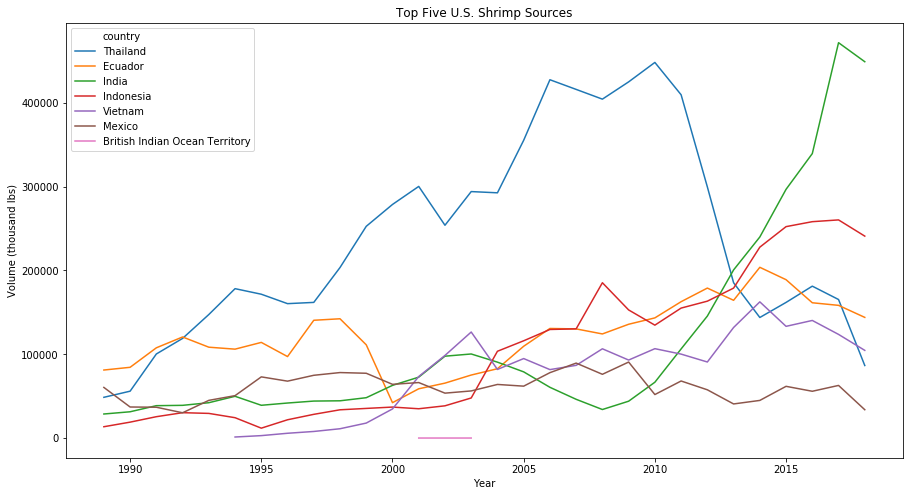

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.__version__

plt.figure(figsize = (15,8)) # plot size
ax = sns.lineplot(pd.to_numeric(shrimp['year']), 'volume', hue = 'country', data = top_five)
ax.set_title('Top Five U.S. Shrimp Sources')
ax.set_xlabel('Year')
ax.set_ylabel('Volume (thousand lbs)')
ax

### Sources
# Changing size of plot
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
# Editing
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# Convert column type
# https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas/28648923

In the late 1980's and early 1990's Ecuador served as the main source of shrimp for the U.S. However, From 1992 to 2013 Thailand served as the U.S.'s main source for shrimp, where the volume of shrimp imported into the U.S. increased up until 2010. U.S. sourcing shrimp from Thailand continued to decrease up until 2013, when India began its period of serving as the U.S.'s main source which continues to this day. The volume imported from India is growing at a steady rate ever since 2013 when it becames the maine shrimp source.